In [ ]:
#Importa algumas bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
#Lê o arquivo
df=pd.read_csv("sigefcamposproducaodesementes.csv",sep=";")

In [ ]:
#Exibe o dataset
df

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,01/01/2013,NaN,9.50,NaN,38.00
1,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,05/01/2013,NaN,6.00,NaN,24.00
2,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,10/01/2013,NaN,9.50,NaN,38.00
3,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,03/02/2013,NaN,4.50,NaN,15.75
4,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,27/01/2013,NaN,1.60,NaN,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...
458613,2023/2024,Glycine max (L.) Merr.,S1,CZ37B43IPRO,Indianópolis,MG,Inscrito,14/10/2023,NaN,81.17,NaN,340.91
458614,2023/2024,Glycine max (L.) Merr.,S1,65I65RSF IPRO,Ivaiporã,PR,Inscrito,23/10/2023,NaN,70.00,NaN,280.00
458615,2023/2024,Glycine max (L.) Merr.,S1,64I61RSF IPRO,Faxinal,PR,Inscrito,09/11/2023,NaN,35.00,NaN,140.00
458616,2023/2024,Glycine max (L.) Merr.,S2,58I60RSF IPRO,Itarare,SP,Inscrito,11/10/2023,NaN,75.00,NaN,375.00


# Pré Processamento

In [ ]:
#Exibe quantos valores nulos há no dataset
print("Quantos são nulos em cada coluna")
for coluna in df.columns:
  print(f"{coluna}: {df[coluna].isna().sum()}")

Quantos são nulos em cada coluna
Safra: 0
Especie: 0
Categoria: 23
Cultivar: 0
Municipio: 5
UF: 0
Status: 0
Data do Plantio: 0
Data de Colheita: 317093
Area: 0
Producao bruta: 317093
Producao estimada: 0


In [ ]:
#Remove as linhas que possuem algum valor nulo
df_novo = df.dropna(subset=df.columns)
df_novo=df_novo.reset_index(drop=True)
df_novo

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,C1,P4285H,Paraúna,GO,Aprovado,16/02/2013,10/06/2013,44.0,409.0600,140.80
1,2013/2013,Zea mays L.,C1,P4285YH,Paraúna,GO,Aprovado,17/02/2013,19/06/2013,37.0,279.1600,118.40
2,2013/2013,Zea mays L.,C1,P3646,Morrinhos,GO,Aprovado,28/02/2013,29/06/2013,23.5,201.6700,105.00
3,2013/2013,Zea mays L.,C1,P3161H,Paraúna,GO,Aprovado,15/02/2013,05/06/2013,28.0,167.7100,72.80
4,2013/2013,Zea mays L.,C1,BG7061H,Caiapônia,GO,Aprovado,14/02/2013,24/06/2013,87.0,848.2700,279.10
...,...,...,...,...,...,...,...,...,...,...,...,...
141511,2023/2023,Capsicum frutescens L.,Genética,RED KSF,Jaíba,MG,Aprovado,25/04/2023,15/10/2023,2.5,0.2851,0.75
141512,2023/2023,Triticum aestivum L.,S1,ORS SOBERANO,Clevelândia,PR,Aprovado,20/06/2023,31/10/2023,18.0,29.1912,54.00
141513,2023/2023,Triticum aestivum L.,S2,TBIO Astro,Xaxim,SC,Aprovado,10/06/2023,26/10/2023,16.0,0.0000,57.60
141514,2022/2023,Phaseolus vulgaris L.,Genética,IAC 2156,Campinas,SP,Aprovado,28/09/2022,22/12/2022,4.5,7.6000,9.00


In [ ]:
#Calcula o erro do dataset
metrics.mean_squared_error(df_novo['Producao bruta'], df_novo['Producao estimada'], squared=False)

37498.89988182788

In [ ]:
# Selecionar as colunas que serão usadas na clusterização
X = df_novo[["Producao bruta"]]

# Definir o número de clusters
k = 3

# Criar e treinar o modelo de kmeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto
labels = kmeans.labels_

# Adicionar os rótulos ao dataframe
df_novo["cluster"] = labels

#Exibe as linhas que pertecem a linha 0
df_novo[df_novo["cluster"] == 0]

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada,cluster
0,2013/2013,Zea mays L.,C1,P4285H,Paraúna,GO,Aprovado,16/02/2013,10/06/2013,44.0,409.0600,140.80,0
1,2013/2013,Zea mays L.,C1,P4285YH,Paraúna,GO,Aprovado,17/02/2013,19/06/2013,37.0,279.1600,118.40,0
2,2013/2013,Zea mays L.,C1,P3646,Morrinhos,GO,Aprovado,28/02/2013,29/06/2013,23.5,201.6700,105.00,0
3,2013/2013,Zea mays L.,C1,P3161H,Paraúna,GO,Aprovado,15/02/2013,05/06/2013,28.0,167.7100,72.80,0
4,2013/2013,Zea mays L.,C1,BG7061H,Caiapônia,GO,Aprovado,14/02/2013,24/06/2013,87.0,848.2700,279.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141511,2023/2023,Capsicum frutescens L.,Genética,RED KSF,Jaíba,MG,Aprovado,25/04/2023,15/10/2023,2.5,0.2851,0.75,0
141512,2023/2023,Triticum aestivum L.,S1,ORS SOBERANO,Clevelândia,PR,Aprovado,20/06/2023,31/10/2023,18.0,29.1912,54.00,0
141513,2023/2023,Triticum aestivum L.,S2,TBIO Astro,Xaxim,SC,Aprovado,10/06/2023,26/10/2023,16.0,0.0000,57.60,0
141514,2022/2023,Phaseolus vulgaris L.,Genética,IAC 2156,Campinas,SP,Aprovado,28/09/2022,22/12/2022,4.5,7.6000,9.00,0


In [ ]:
#Atualiza o dataset apenas com as instâncias da classe 0
df_novo=df_novo[df_novo["cluster"] == 0]
#Remove a coluna cluster
df_novo=df_novo.drop(columns=["cluster"])
#Reinicia os índices
df_novo=df_novo.reset_index(drop=True)

#Exibe o novo dataset
df_novo

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,C1,P4285H,Paraúna,GO,Aprovado,16/02/2013,10/06/2013,44.0,409.0600,140.80
1,2013/2013,Zea mays L.,C1,P4285YH,Paraúna,GO,Aprovado,17/02/2013,19/06/2013,37.0,279.1600,118.40
2,2013/2013,Zea mays L.,C1,P3646,Morrinhos,GO,Aprovado,28/02/2013,29/06/2013,23.5,201.6700,105.00
3,2013/2013,Zea mays L.,C1,P3161H,Paraúna,GO,Aprovado,15/02/2013,05/06/2013,28.0,167.7100,72.80
4,2013/2013,Zea mays L.,C1,BG7061H,Caiapônia,GO,Aprovado,14/02/2013,24/06/2013,87.0,848.2700,279.10
...,...,...,...,...,...,...,...,...,...,...,...,...
139641,2023/2023,Capsicum frutescens L.,Genética,RED KSF,Jaíba,MG,Aprovado,25/04/2023,15/10/2023,2.5,0.2851,0.75
139642,2023/2023,Triticum aestivum L.,S1,ORS SOBERANO,Clevelândia,PR,Aprovado,20/06/2023,31/10/2023,18.0,29.1912,54.00
139643,2023/2023,Triticum aestivum L.,S2,TBIO Astro,Xaxim,SC,Aprovado,10/06/2023,26/10/2023,16.0,0.0000,57.60
139644,2022/2023,Phaseolus vulgaris L.,Genética,IAC 2156,Campinas,SP,Aprovado,28/09/2022,22/12/2022,4.5,7.6000,9.00


In [ ]:
#Calcula o novo erro
print(metrics.mean_squared_error(df_novo['Producao bruta'], df_novo['Producao estimada'], squared=False))

9193.065001364641


In [ ]:
#Função usada para plotar o historgrama de uma feature contínua
def plot_histogram_continuo(df, column,bins):
  bins.append(max(df[column]))

  h,e = np.histogram(df[column], bins=bins)

  for i in range(0,len(bins)):
    bins[i]=str(bins[i])

  plt.bar(bins[:-1],h, width=1, edgecolor='k', align="center")

  plt.ylabel("Frequência")
  plt.xlabel(column)
  plt.title(f"Histograma da {column}")
  plt.show()

#Função usada para plotar o histograma de uma feature discreta
def plot_histogram_discretas(df, column):
  # Cria um histograma com os valores discretos
  plt.hist(df[column].sort_values(), bins=len(set(df[column])), edgecolor='k', align='mid')
  # Adiciona um título e os nomes dos eixos
  plt.title(f"Histograma da coluna {column}")
  plt.xlabel("Valores")
  plt.ylabel("Frequência")

  plt.xticks(rotation = 45)

  # Mostra o gráfico na tela
  plt.show()

#Função que exibe o gráfico de como uma feature influencia no target
def plotar_grafico(df, coluna, target):
  plt.scatter(df[coluna].sort_values(), df.sort_values(by=coluna)[target])
  plt.title(f"Gráfico do {target} em função de {coluna}")
  plt.xlabel(coluna)
  plt.ylabel(target)

  plt.xticks(rotation = 45)

  plt.show()

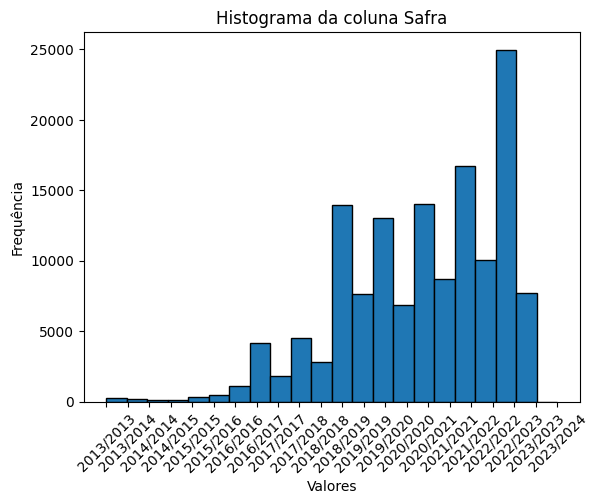

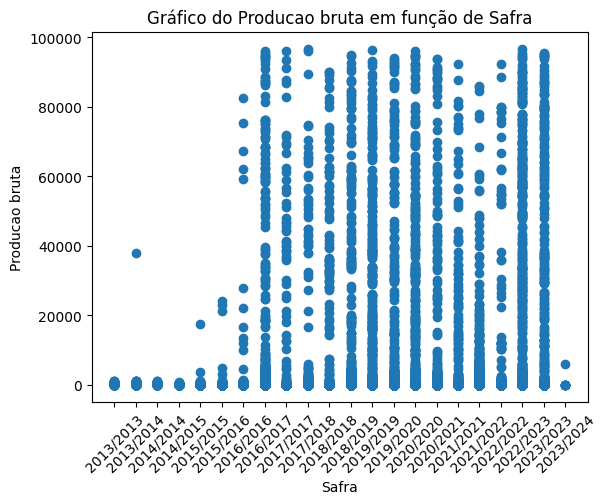

In [ ]:
plot_histogram_discretas(df_novo, "Safra")
plotar_grafico(df_novo, "Safra", "Producao bruta")

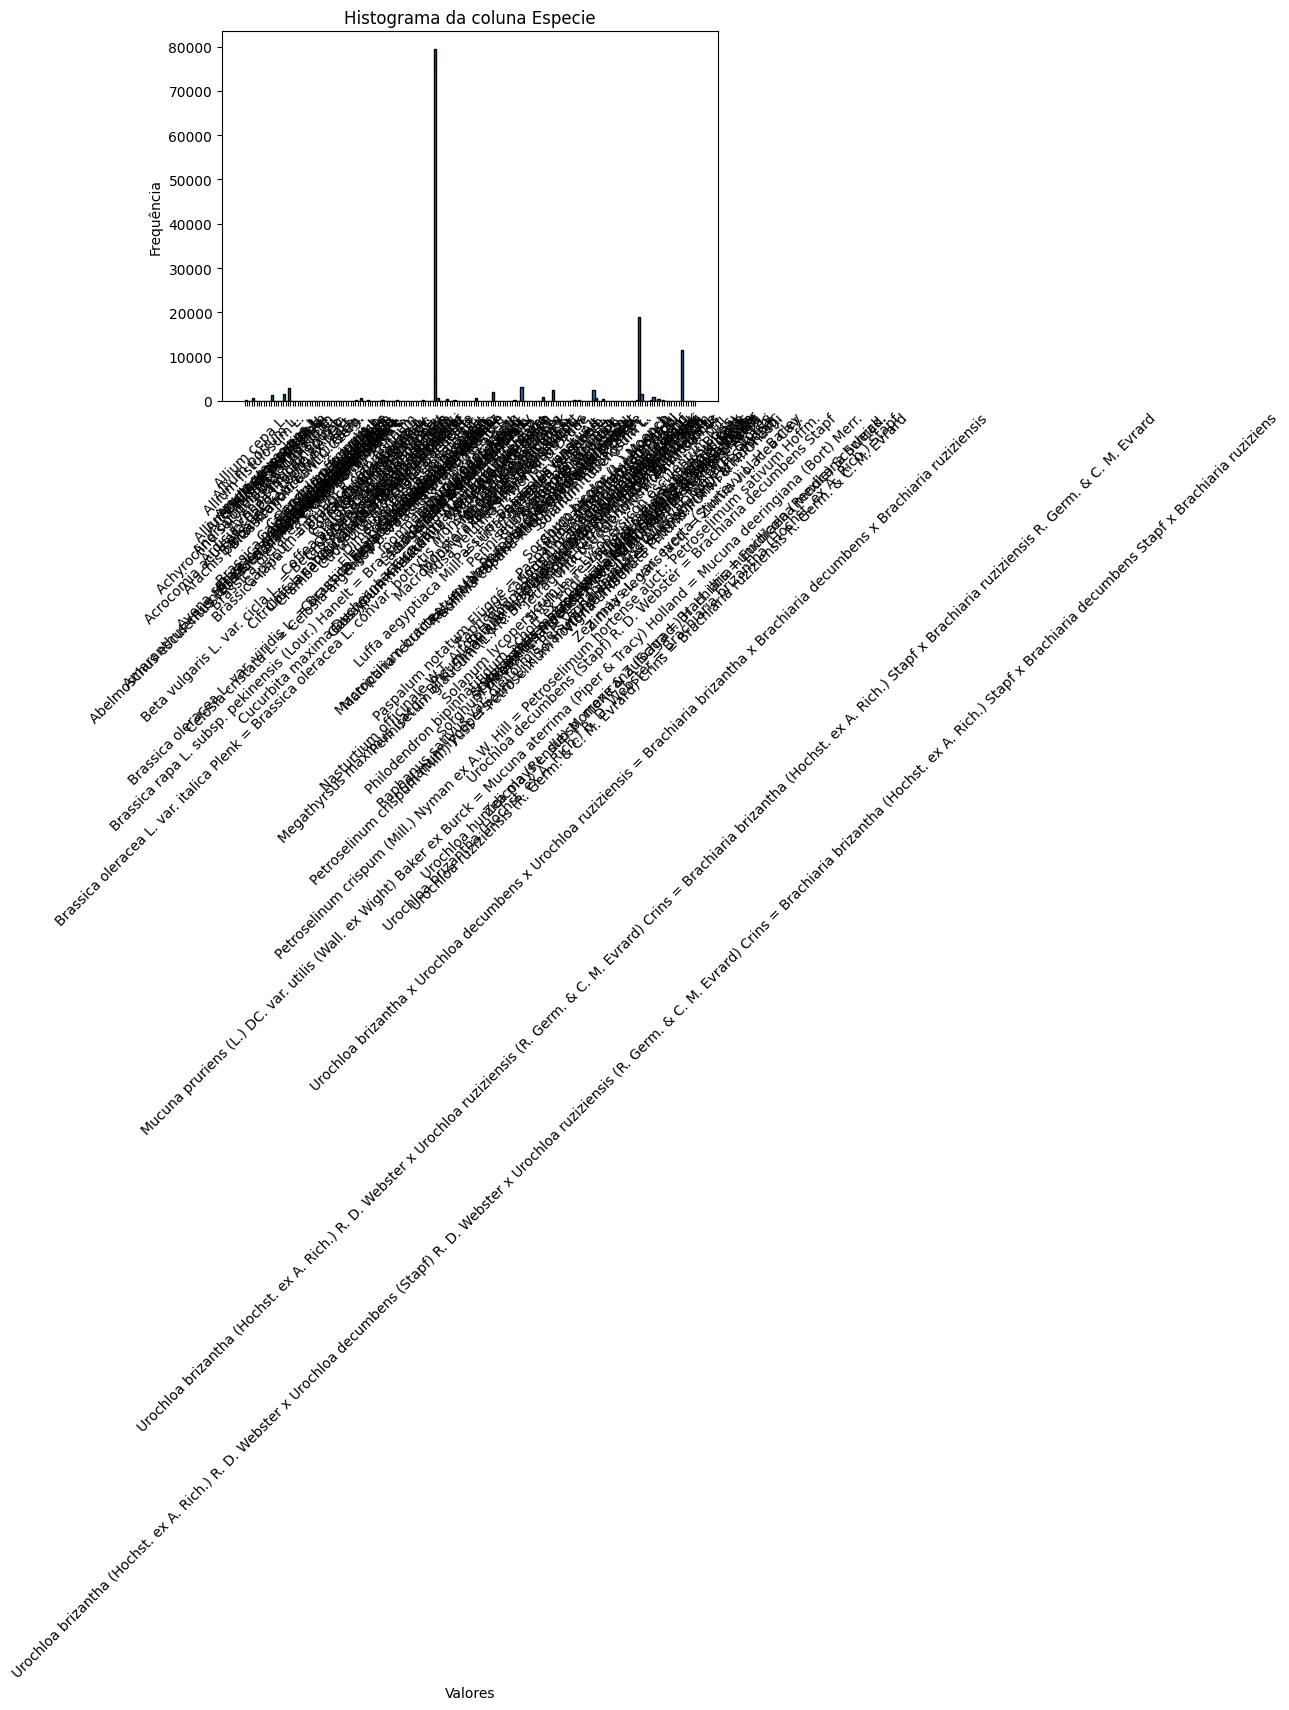

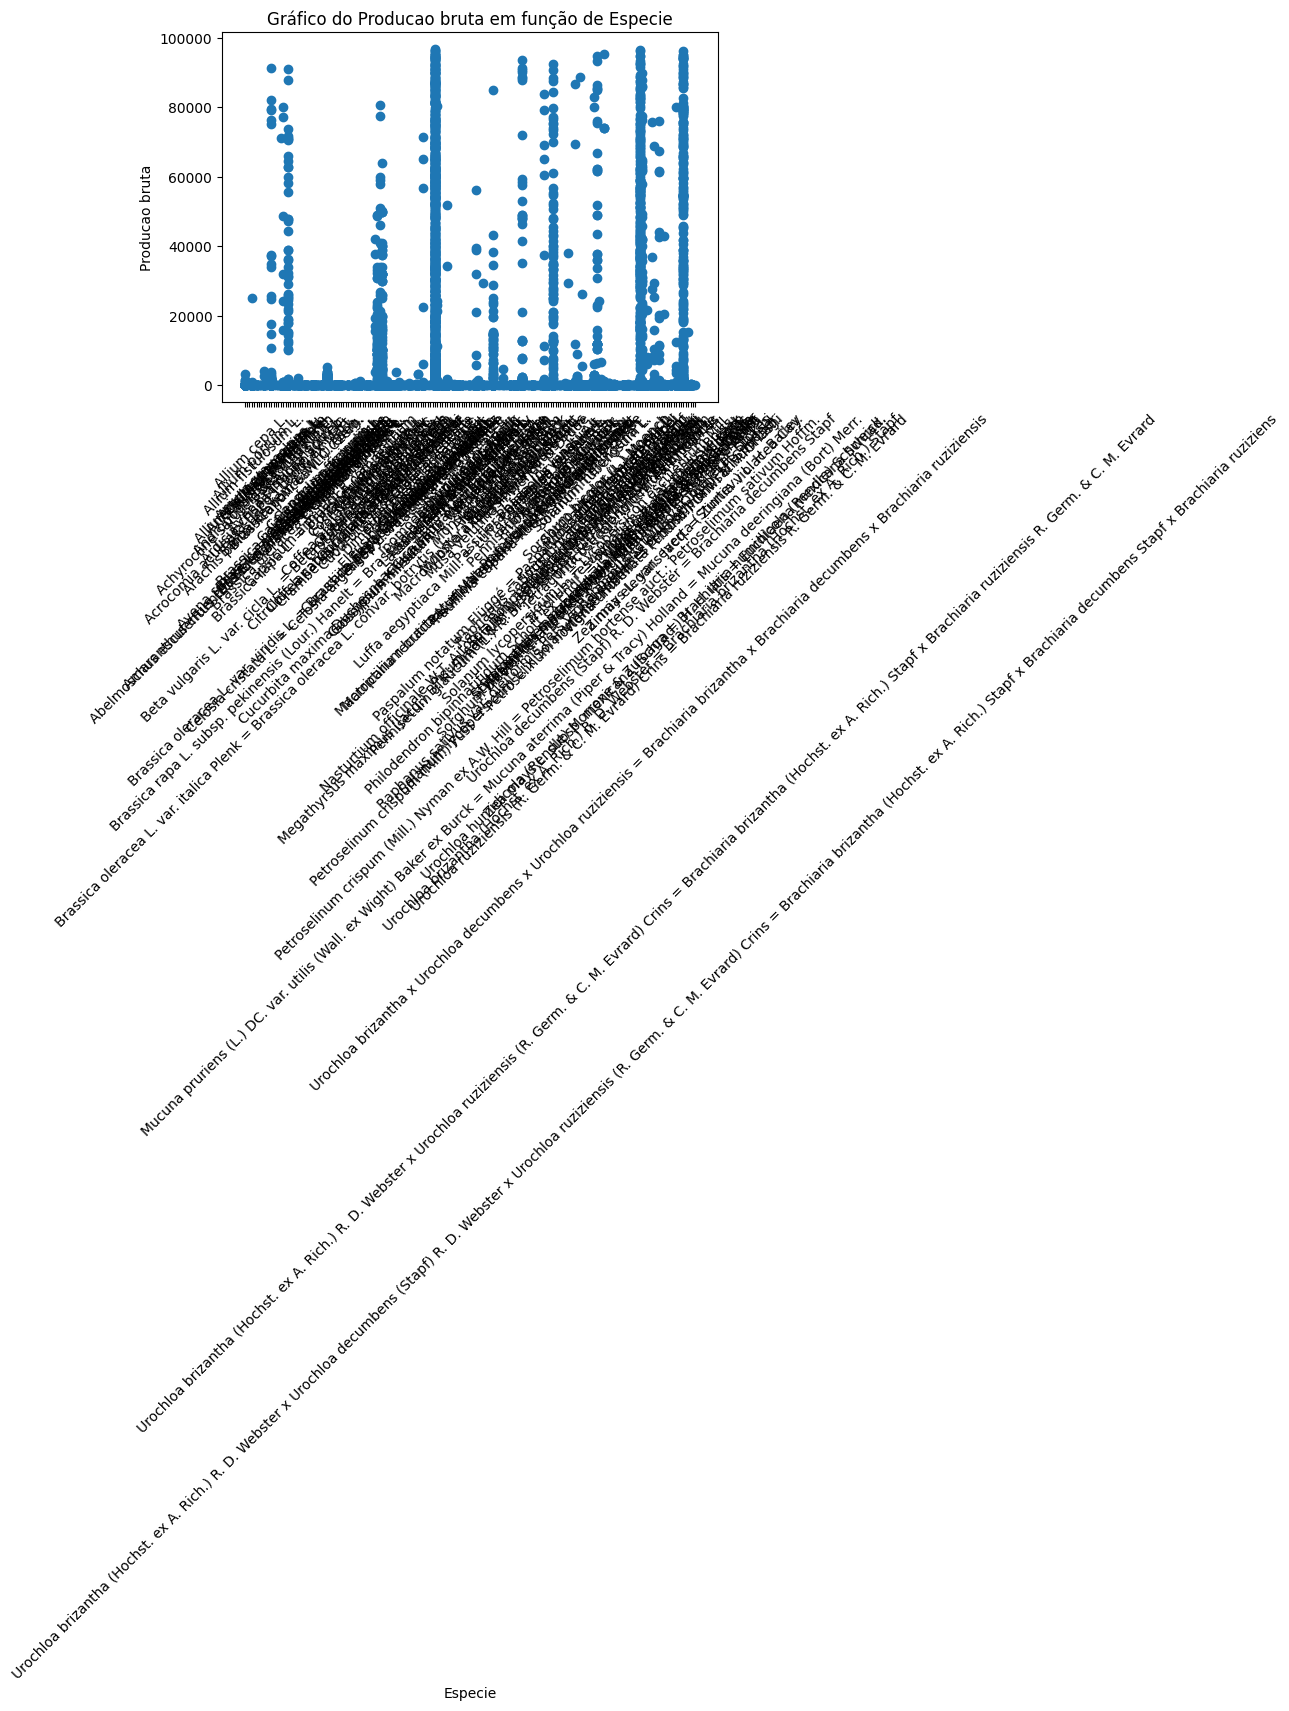

In [ ]:
plot_histogram_discretas(df_novo, "Especie")
plotar_grafico(df_novo, "Especie", "Producao bruta")

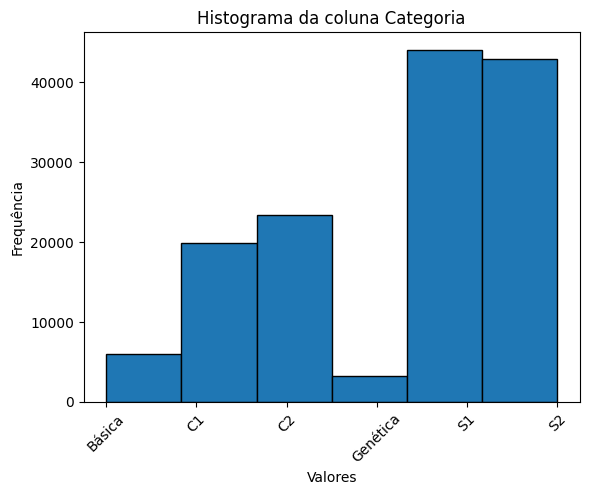

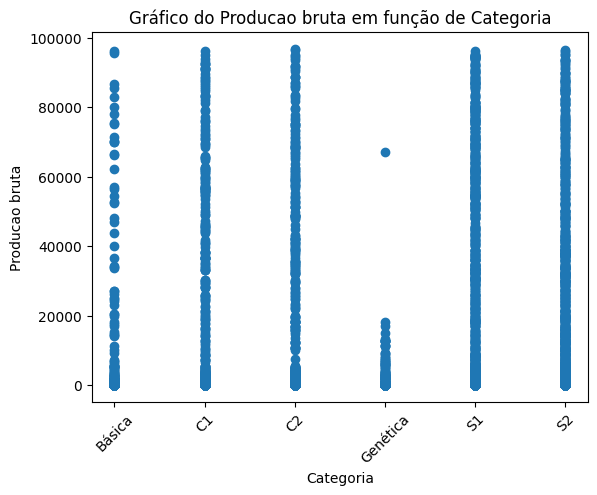

In [ ]:
plot_histogram_discretas(df_novo, "Categoria")
plotar_grafico(df_novo, "Categoria", "Producao bruta")

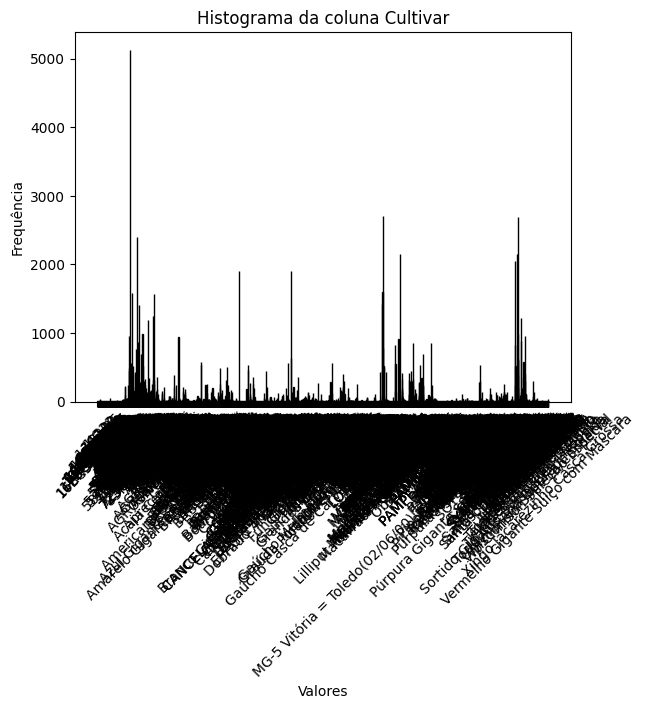

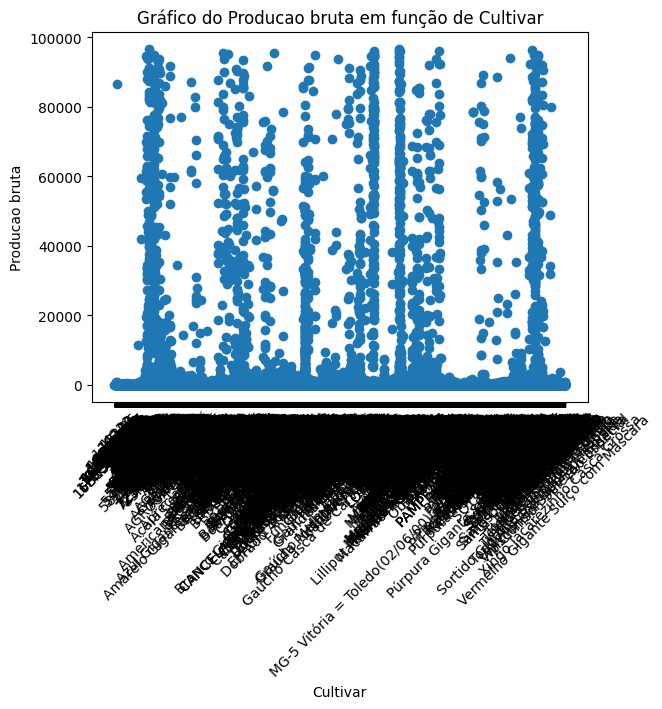

In [ ]:
plot_histogram_discretas(df_novo, "Cultivar")
plotar_grafico(df_novo, "Cultivar", "Producao bruta")

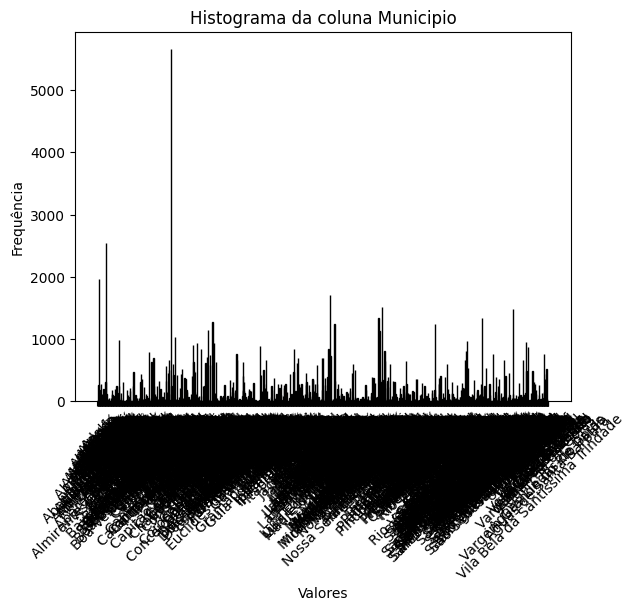

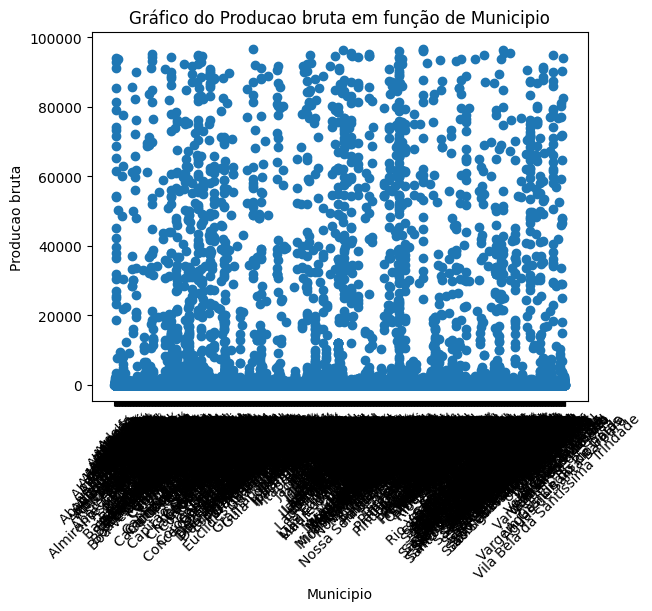

In [ ]:
plot_histogram_discretas(df_novo, "Municipio")
plotar_grafico(df_novo, "Municipio", "Producao bruta")

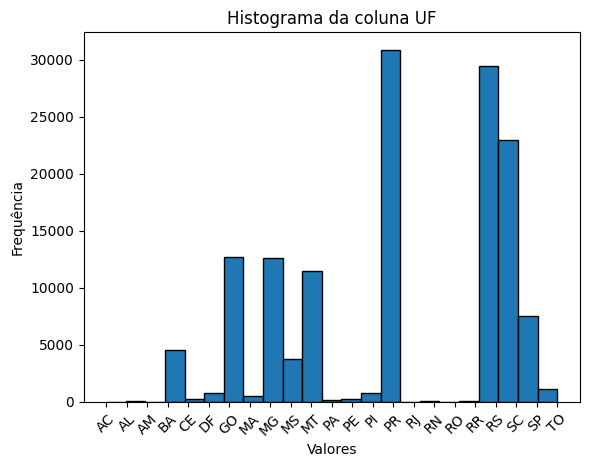

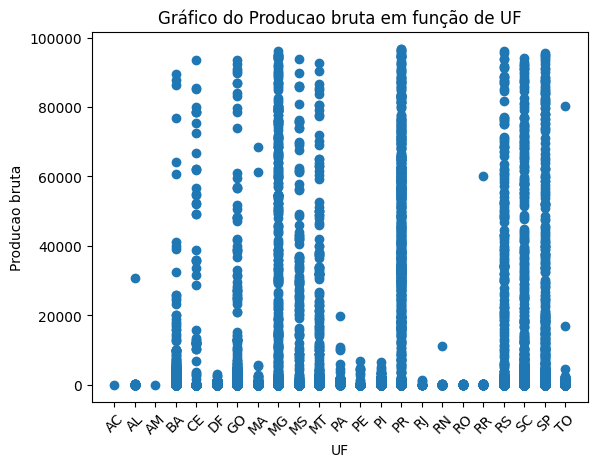

In [ ]:
plot_histogram_discretas(df_novo, "UF")
plotar_grafico(df_novo, "UF", "Producao bruta")

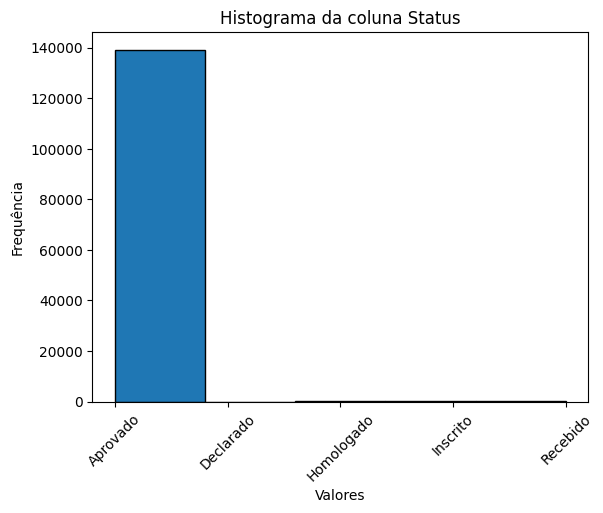

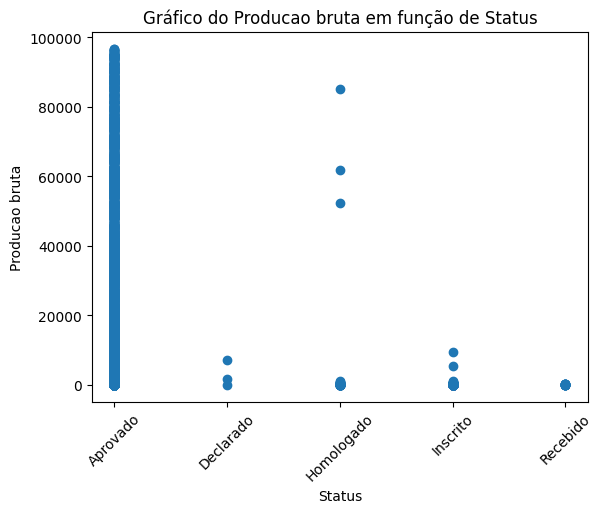

In [ ]:
plot_histogram_discretas(df_novo, "Status")
plotar_grafico(df_novo, "Status", "Producao bruta")

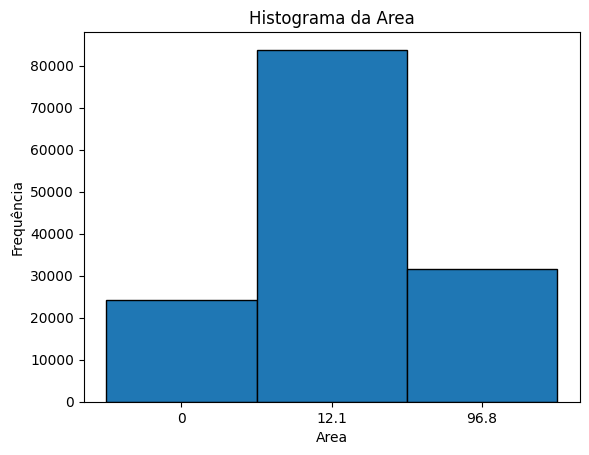

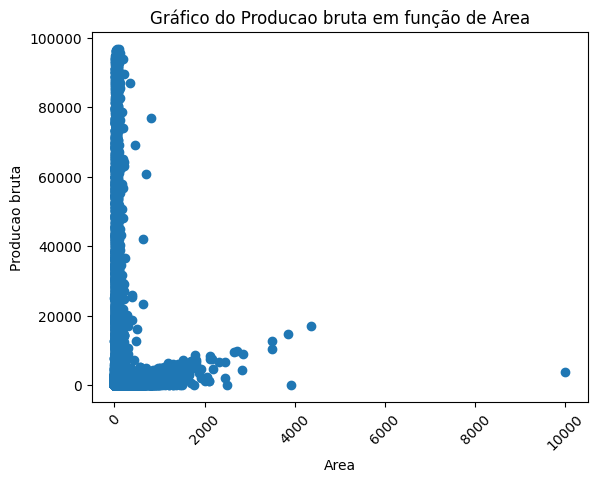

In [ ]:
plot_histogram_continuo(df_novo, "Area",[0,12.1,96.8])
plotar_grafico(df_novo, "Area", "Producao bruta")

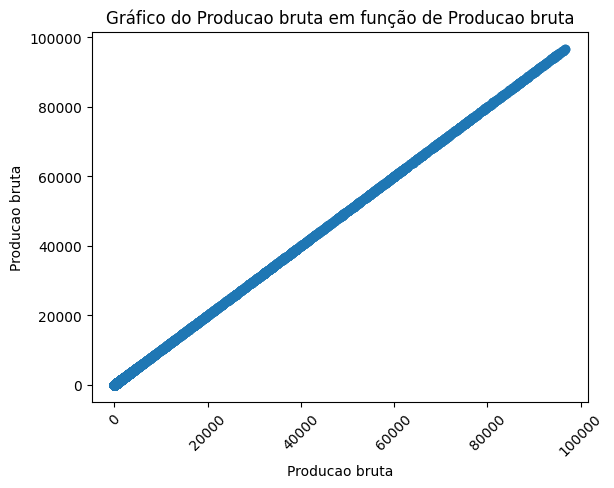

In [ ]:
plotar_grafico(df_novo, "Producao bruta", "Producao bruta")

In [ ]:
#Valores estimados pelo gov
e = df_novo["Producao estimada"]

# df_novo = pd.get_dummies(df_novo, columns=["Especie","Categoria", "UF"])
for column in ["Especie", "Categoria", "UF","Safra"]:
  print(column)
  df_novo[column].replace({i: ki for ki, i in enumerate(sorted(df_novo[column].unique()))},inplace=True)
df_novo

Especie
Categoria
UF
Safra


,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,0,182,1,P4285H,Paraúna,6,Aprovado,16/02/2013,10/06/2013,44.0,409.0600,140.80
1,0,182,1,P4285YH,Paraúna,6,Aprovado,17/02/2013,19/06/2013,37.0,279.1600,118.40
2,0,182,1,P3646,Morrinhos,6,Aprovado,28/02/2013,29/06/2013,23.5,201.6700,105.00
3,0,182,1,P3161H,Paraúna,6,Aprovado,15/02/2013,05/06/2013,28.0,167.7100,72.80
4,0,182,1,BG7061H,Caiapônia,6,Aprovado,14/02/2013,24/06/2013,87.0,848.2700,279.10
...,...,...,...,...,...,...,...,...,...,...,...,...
139641,20,39,3,RED KSF,Jaíba,8,Aprovado,25/04/2023,15/10/2023,2.5,0.2851,0.75
139642,20,164,4,ORS SOBERANO,Clevelândia,14,Aprovado,20/06/2023,31/10/2023,18.0,29.1912,54.00
139643,20,164,5,TBIO Astro,Xaxim,20,Aprovado,10/06/2023,26/10/2023,16.0,0.0000,57.60
139644,19,128,3,IAC 2156,Campinas,21,Aprovado,28/09/2022,22/12/2022,4.5,7.6000,9.00


# Modelos considerando Espécie e Safra

In [ ]:
#Remove as features que não são relevantes
X=df_novo.drop(columns=["Producao bruta","Cultivar","Data de Colheita","Producao estimada","Data do Plantio", "Status", "Municipio"],axis=1)
y=df_novo["Producao bruta"]

In [ ]:
X

,Safra,Especie,Categoria,UF,Area
0,0,182,1,6,44.0
1,0,182,1,6,37.0
2,0,182,1,6,23.5
3,0,182,1,6,28.0
4,0,182,1,6,87.0
...,...,...,...,...,...
139641,20,39,3,8,2.5
139642,20,164,4,14,18.0
139643,20,164,5,20,16.0
139644,19,128,3,21,4.5


In [ ]:
X = X.apply(lambda x: (x - x.mean()) / x.std()) # Normaliza com Standard Scaler
X

,Safra,Especie,Categoria,UF,Area
0,-3.911231,1.763234,-1.470820,-1.510380,-0.256657
1,-3.911231,1.763234,-1.470820,-1.510380,-0.324706
2,-3.911231,1.763234,-1.470820,-1.510380,-0.455945
3,-3.911231,1.763234,-1.470820,-1.510380,-0.412199
4,-3.911231,1.763234,-1.470820,-1.510380,0.161362
...,...,...,...,...,...
139641,1.347190,-1.420453,-0.218409,-1.145831,-0.660094
139642,1.347190,1.362490,0.407796,-0.052184,-0.509413
139643,1.347190,1.362490,1.034002,1.041462,-0.528855
139644,1.084269,0.561002,-0.218409,1.223737,-0.640651


In [ ]:
y

0         409.0600
1         279.1600
2         201.6700
3         167.7100
4         848.2700
            ...   
139641      0.2851
139642     29.1912
139643      0.0000
139644      7.6000
139645      2.6000
Name: Producao bruta, Length: 139646, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.2, random_state=10)

In [ ]:
X_train

,Safra,Especie,Categoria,UF,Area
9888,-1.544941,-0.529911,1.034002,1.041462,-0.276100
75778,0.295506,1.362490,-1.470820,-0.052184,-0.431642
63129,0.032585,-0.529911,1.034002,-1.510380,-0.339289
9929,-1.544941,-0.529911,1.034002,1.041462,-0.441363
49295,-0.493257,-0.529911,-0.844615,-0.052184,-0.458861
...,...,...,...,...,...
9372,-1.807862,1.362490,-2.097025,-0.052184,-0.324706
105595,0.821348,1.362490,0.407796,0.859188,-0.567741
93553,0.558427,-0.529911,1.034002,-0.052184,-0.567741
94735,0.558427,-0.529911,1.034002,1.041462,-0.344149


In [ ]:
X_test

,Safra,Especie,Categoria,UF,Area
63275,0.032585,-0.529911,0.407796,-0.052184,-0.567741
39536,-0.493257,1.763234,0.407796,-1.145831,0.112756
59934,0.032585,-0.529911,0.407796,1.041462,-0.052508
95895,0.558427,-0.529911,0.407796,-1.145831,1.114057
25778,-1.019099,-0.529911,0.407796,0.859188,0.287740
...,...,...,...,...,...
121236,1.084269,1.473808,-0.844615,-0.963557,-0.635791
126753,1.084269,-0.529911,1.034002,0.859188,1.143222
15981,-1.019099,-2.043832,0.407796,1.223737,-0.421337
1252,-2.596626,-0.529911,0.407796,0.859188,-0.314985


In [ ]:
y_train

9888       56.700
75778      36.166
63129       0.000
9929       37.500
49295      81.900
           ...   
9372      114.520
105595     31.920
93553      42.649
94735     160.360
83209      72.414
Name: Producao bruta, Length: 111716, dtype: float64

In [ ]:
y_test

63275      32.432
39536     313.000
59934     191.650
95895     661.260
25778     384.100
           ...   
121236      7.000
126753    557.000
15981      89.656
1252      116.940
85045     159.000
Name: Producao bruta, Length: 27930, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Treinando o regressor
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

254.83864415720882

In [ ]:
from sklearn import metrics
def test_models(models):
  for ki in models:
    model = models[ki]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("{:30s} -> {}".format(ki, metrics.mean_squared_error(y_test, y_pred, squared=False)))


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

print("{:25s} -> {}".format("Original", metrics.mean_squared_error(y_test, e_test, squared=False)))
test_models({
  "LinearRegression": LinearRegression(),
  #"LinearRegressionCentered": LinearRegression(fit_intercept=False),
  "LinearRegressionPositive": LinearRegression(positive=True),
  #"Lasso": Lasso(),
  "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
  "DecisionTreeRegressorF_MSE": DecisionTreeRegressor(random_state=42, criterion="friedman_mse"),
  "DecisionTreeRegressorRandom": DecisionTreeRegressor(random_state=42, splitter="random"),
  "RandomForestRegressor": RandomForestRegressor(random_state=42),
  "KNeighborsRegressor":KNeighborsRegressor(),
  "GradientBoostRegressor": GradientBoostingRegressor(random_state=42),
  "MLPRegressorSmall": MLPRegressor(random_state=42, max_iter=400, hidden_layer_sizes=(50,)),
  "MLPRegressor": MLPRegressor(random_state=42, max_iter=400),
  #"MLPRegressorBig": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100), max_iter=400),
  #"MLPRegressorBigger": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=400),
})

Original                  -> 7864.788375236228
LinearRegression               -> 5888.854326523118
LinearRegressionPositive       -> 5890.261640309882
DecisionTreeRegressor          -> 6506.798048774119
DecisionTreeRegressorF_MSE     -> 6511.803949855258
DecisionTreeRegressorRandom    -> 6420.099630570954
RandomForestRegressor          -> 5774.771134594194
KNeighborsRegressor            -> 5828.0289381805105
GradientBoostRegressor         -> 5806.708998676144


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressorSmall              -> 5873.697931453458
MLPRegressor                   -> 5871.105221685826


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


# Modelo considerando apenas safra

In [ ]:
#Remove as features que não são relevantes
X=df_novo.drop(columns=["Producao bruta","Especie","Cultivar","Data de Colheita","Producao estimada","Data do Plantio", "Status", "Municipio"],axis=1)
y=df_novo["Producao bruta"]

In [ ]:
X

,Safra,Categoria,UF,Area
0,0,1,6,44.0
1,0,1,6,37.0
2,0,1,6,23.5
3,0,1,6,28.0
4,0,1,6,87.0
...,...,...,...,...
139641,20,3,8,2.5
139642,20,4,14,18.0
139643,20,5,20,16.0
139644,19,3,21,4.5


In [ ]:
X = X.apply(lambda x: (x - x.mean()) / x.std()) # Normaliza com Standard Scaler
X

,Safra,Categoria,UF,Area
0,-3.911231,-1.470820,-1.510380,-0.256657
1,-3.911231,-1.470820,-1.510380,-0.324706
2,-3.911231,-1.470820,-1.510380,-0.455945
3,-3.911231,-1.470820,-1.510380,-0.412199
4,-3.911231,-1.470820,-1.510380,0.161362
...,...,...,...,...
139641,1.347190,-0.218409,-1.145831,-0.660094
139642,1.347190,0.407796,-0.052184,-0.509413
139643,1.347190,1.034002,1.041462,-0.528855
139644,1.084269,-0.218409,1.223737,-0.640651


In [ ]:
y

0         409.0600
1         279.1600
2         201.6700
3         167.7100
4         848.2700
            ...   
139641      0.2851
139642     29.1912
139643      0.0000
139644      7.6000
139645      2.6000
Name: Producao bruta, Length: 139646, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.2, random_state=10)

In [ ]:
X_train

,Safra,Categoria,UF,Area
9888,-1.544941,1.034002,1.041462,-0.276100
75778,0.295506,-1.470820,-0.052184,-0.431642
63129,0.032585,1.034002,-1.510380,-0.339289
9929,-1.544941,1.034002,1.041462,-0.441363
49295,-0.493257,-0.844615,-0.052184,-0.458861
...,...,...,...,...
9372,-1.807862,-2.097025,-0.052184,-0.324706
105595,0.821348,0.407796,0.859188,-0.567741
93553,0.558427,1.034002,-0.052184,-0.567741
94735,0.558427,1.034002,1.041462,-0.344149


In [ ]:
X_test

,Safra,Categoria,UF,Area
63275,0.032585,0.407796,-0.052184,-0.567741
39536,-0.493257,0.407796,-1.145831,0.112756
59934,0.032585,0.407796,1.041462,-0.052508
95895,0.558427,0.407796,-1.145831,1.114057
25778,-1.019099,0.407796,0.859188,0.287740
...,...,...,...,...
121236,1.084269,-0.844615,-0.963557,-0.635791
126753,1.084269,1.034002,0.859188,1.143222
15981,-1.019099,0.407796,1.223737,-0.421337
1252,-2.596626,0.407796,0.859188,-0.314985


In [ ]:
y_train

9888       56.700
75778      36.166
63129       0.000
9929       37.500
49295      81.900
           ...   
9372      114.520
105595     31.920
93553      42.649
94735     160.360
83209      72.414
Name: Producao bruta, Length: 111716, dtype: float64

In [ ]:
y_test

63275      32.432
39536     313.000
59934     191.650
95895     661.260
25778     384.100
           ...   
121236      7.000
126753    557.000
15981      89.656
1252      116.940
85045     159.000
Name: Producao bruta, Length: 27930, dtype: float64

In [ ]:
from sklearn import metrics
def test_models(models):
  for ki in models:
    model = models[ki]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("{:30s} -> {}".format(ki, metrics.mean_squared_error(y_test, y_pred, squared=False)))


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

print("{:25s} -> {}".format("Original", metrics.mean_squared_error(y_test, e_test, squared=False)))
test_models({
  "LinearRegression": LinearRegression(),
  #"LinearRegressionCentered": LinearRegression(fit_intercept=False),
  "LinearRegressionPositive": LinearRegression(positive=True),
  #"Lasso": Lasso(),
  "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
  "DecisionTreeRegressorF_MSE": DecisionTreeRegressor(random_state=42, criterion="friedman_mse"),
  "DecisionTreeRegressorRandom": DecisionTreeRegressor(random_state=42, splitter="random"),
  "RandomForestRegressor": RandomForestRegressor(random_state=42),
  "KNeighborsRegressor":KNeighborsRegressor(),
  "GradientBoostRegressor": GradientBoostingRegressor(random_state=42),
  "MLPRegressorSmall": MLPRegressor(random_state=42, max_iter=400, hidden_layer_sizes=(50,)),
  "MLPRegressor": MLPRegressor(random_state=42, max_iter=400),
  #"MLPRegressorBig": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100), max_iter=400),
  #"MLPRegressorBigger": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=400),
})

Original                  -> 7864.788375236228
LinearRegression               -> 5890.237566876475
LinearRegressionPositive       -> 5892.034366834168
DecisionTreeRegressor          -> 6508.796726862782
DecisionTreeRegressorF_MSE     -> 6510.2181593349405
DecisionTreeRegressorRandom    -> 6406.48865346718
RandomForestRegressor          -> 5993.813769912201
KNeighborsRegressor            -> 5943.717803318274
GradientBoostRegressor         -> 5822.400450865001


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressorSmall              -> 5881.437582616626
MLPRegressor                   -> 5881.088484249856


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


# Modelos considerando apenas Especie

In [ ]:
#Remove as features que não são relevantes
X=df_novo.drop(columns=["Producao bruta","Safra","Cultivar","Data de Colheita","Producao estimada","Data do Plantio", "Status", "Municipio"],axis=1)
y=df_novo["Producao bruta"]

In [ ]:
X

,Especie,Categoria,UF,Area
0,182,1,6,44.0
1,182,1,6,37.0
2,182,1,6,23.5
3,182,1,6,28.0
4,182,1,6,87.0
...,...,...,...,...
139641,39,3,8,2.5
139642,164,4,14,18.0
139643,164,5,20,16.0
139644,128,3,21,4.5


In [ ]:
X = X.apply(lambda x: (x - x.mean()) / x.std()) # Normaliza com Standard Scaler
X

,Especie,Categoria,UF,Area
0,1.763234,-1.470820,-1.510380,-0.256657
1,1.763234,-1.470820,-1.510380,-0.324706
2,1.763234,-1.470820,-1.510380,-0.455945
3,1.763234,-1.470820,-1.510380,-0.412199
4,1.763234,-1.470820,-1.510380,0.161362
...,...,...,...,...
139641,-1.420453,-0.218409,-1.145831,-0.660094
139642,1.362490,0.407796,-0.052184,-0.509413
139643,1.362490,1.034002,1.041462,-0.528855
139644,0.561002,-0.218409,1.223737,-0.640651


In [ ]:
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.2, random_state=10)

In [ ]:
X_test

,Especie,Categoria,UF,Area
63275,-0.529911,0.407796,-0.052184,-0.567741
39536,1.763234,0.407796,-1.145831,0.112756
59934,-0.529911,0.407796,1.041462,-0.052508
95895,-0.529911,0.407796,-1.145831,1.114057
25778,-0.529911,0.407796,0.859188,0.287740
...,...,...,...,...
121236,1.473808,-0.844615,-0.963557,-0.635791
126753,-0.529911,1.034002,0.859188,1.143222
15981,-2.043832,0.407796,1.223737,-0.421337
1252,-0.529911,0.407796,0.859188,-0.314985


In [ ]:
X_train

,Especie,Categoria,UF,Area
9888,-0.529911,1.034002,1.041462,-0.276100
75778,1.362490,-1.470820,-0.052184,-0.431642
63129,-0.529911,1.034002,-1.510380,-0.339289
9929,-0.529911,1.034002,1.041462,-0.441363
49295,-0.529911,-0.844615,-0.052184,-0.458861
...,...,...,...,...
9372,1.362490,-2.097025,-0.052184,-0.324706
105595,1.362490,0.407796,0.859188,-0.567741
93553,-0.529911,1.034002,-0.052184,-0.567741
94735,-0.529911,1.034002,1.041462,-0.344149


In [ ]:
y_train

9888       56.700
75778      36.166
63129       0.000
9929       37.500
49295      81.900
           ...   
9372      114.520
105595     31.920
93553      42.649
94735     160.360
83209      72.414
Name: Producao bruta, Length: 111716, dtype: float64

In [ ]:
y_test

63275      32.432
39536     313.000
59934     191.650
95895     661.260
25778     384.100
           ...   
121236      7.000
126753    557.000
15981      89.656
1252      116.940
85045     159.000
Name: Producao bruta, Length: 27930, dtype: float64

In [ ]:
from sklearn import metrics
def test_models(models):
  for ki in models:
    model = models[ki]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("{:30s} -> {}".format(ki, metrics.mean_squared_error(y_test, y_pred, squared=False)))


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

print("{:25s} -> {}".format("Original", metrics.mean_squared_error(y_test, e_test, squared=False)))
test_models({
  "LinearRegression": LinearRegression(),
  #"LinearRegressionCentered": LinearRegression(fit_intercept=False),
  "LinearRegressionPositive": LinearRegression(positive=True),
  #"Lasso": Lasso(),
  "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
  "DecisionTreeRegressorF_MSE": DecisionTreeRegressor(random_state=42, criterion="friedman_mse"),
  "DecisionTreeRegressorRandom": DecisionTreeRegressor(random_state=42, splitter="random"),
  "RandomForestRegressor": RandomForestRegressor(random_state=42),
  "KNeighborsRegressor":KNeighborsRegressor(),
  "GradientBoostRegressor": GradientBoostingRegressor(random_state=42),
  "MLPRegressorSmall": MLPRegressor(random_state=42, max_iter=400, hidden_layer_sizes=(50,)),
  "MLPRegressor": MLPRegressor(random_state=42, max_iter=400),
  #"MLPRegressorBig": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100), max_iter=400),
  #"MLPRegressorBigger": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=400),
})

Original                  -> 7864.788375236228
LinearRegression               -> 5889.513736436738
LinearRegressionPositive       -> 5890.261640309882
DecisionTreeRegressor          -> 6308.216907764387
DecisionTreeRegressorF_MSE     -> 6318.042535211366
DecisionTreeRegressorRandom    -> 6174.638537202774
RandomForestRegressor          -> 5966.448530935506
KNeighborsRegressor            -> 6129.178036591535
GradientBoostRegressor         -> 5820.143491669708


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressorSmall              -> 5876.318670738082
MLPRegressor                   -> 5875.969538262339


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


# Modelos sem considerar Safra nem Espécie

In [ ]:
#Remove as features que não são relevantes
X=df_novo.drop(columns=["Producao bruta","Especie","Safra", "Cultivar","Data de Colheita","Producao estimada","Data do Plantio", "Status", "Municipio"],axis=1)
y=df_novo["Producao bruta"]

In [ ]:
X

,Categoria,UF,Area
0,1,6,44.0
1,1,6,37.0
2,1,6,23.5
3,1,6,28.0
4,1,6,87.0
...,...,...,...
139641,3,8,2.5
139642,4,14,18.0
139643,5,20,16.0
139644,3,21,4.5


In [ ]:
X = X.apply(lambda x: (x - x.mean()) / x.std()) # Normaliza com Standard Scaler
X

,Categoria,UF,Area
0,-1.470820,-1.510380,-0.256657
1,-1.470820,-1.510380,-0.324706
2,-1.470820,-1.510380,-0.455945
3,-1.470820,-1.510380,-0.412199
4,-1.470820,-1.510380,0.161362
...,...,...,...
139641,-0.218409,-1.145831,-0.660094
139642,0.407796,-0.052184,-0.509413
139643,1.034002,1.041462,-0.528855
139644,-0.218409,1.223737,-0.640651


In [ ]:
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.2, random_state=10)

In [ ]:
X_test

,Categoria,UF,Area
63275,0.407796,-0.052184,-0.567741
39536,0.407796,-1.145831,0.112756
59934,0.407796,1.041462,-0.052508
95895,0.407796,-1.145831,1.114057
25778,0.407796,0.859188,0.287740
...,...,...,...
121236,-0.844615,-0.963557,-0.635791
126753,1.034002,0.859188,1.143222
15981,0.407796,1.223737,-0.421337
1252,0.407796,0.859188,-0.314985


In [ ]:
X_train

,Categoria,UF,Area
9888,1.034002,1.041462,-0.276100
75778,-1.470820,-0.052184,-0.431642
63129,1.034002,-1.510380,-0.339289
9929,1.034002,1.041462,-0.441363
49295,-0.844615,-0.052184,-0.458861
...,...,...,...
9372,-2.097025,-0.052184,-0.324706
105595,0.407796,0.859188,-0.567741
93553,1.034002,-0.052184,-0.567741
94735,1.034002,1.041462,-0.344149


In [ ]:
y_train

9888       56.700
75778      36.166
63129       0.000
9929       37.500
49295      81.900
           ...   
9372      114.520
105595     31.920
93553      42.649
94735     160.360
83209      72.414
Name: Producao bruta, Length: 111716, dtype: float64

In [ ]:
y_test

63275      32.432
39536     313.000
59934     191.650
95895     661.260
25778     384.100
           ...   
121236      7.000
126753    557.000
15981      89.656
1252      116.940
85045     159.000
Name: Producao bruta, Length: 27930, dtype: float64

In [ ]:
from sklearn import metrics
def test_models(models):
  for ki in models:
    model = models[ki]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("{:30s} -> {}".format(ki, metrics.mean_squared_error(y_test, y_pred, squared=False)))


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

print("{:25s} -> {}".format("Original", metrics.mean_squared_error(y_test, e_test, squared=False)))
test_models({
  "LinearRegression": LinearRegression(),
  #"LinearRegressionCentered": LinearRegression(fit_intercept=False),
  "LinearRegressionPositive": LinearRegression(positive=True),
  #"Lasso": Lasso(),
  "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
  "DecisionTreeRegressorF_MSE": DecisionTreeRegressor(random_state=42, criterion="friedman_mse"),
  "DecisionTreeRegressorRandom": DecisionTreeRegressor(random_state=42, splitter="random"),
  "RandomForestRegressor": RandomForestRegressor(random_state=42),
  "KNeighborsRegressor":KNeighborsRegressor(),
  "GradientBoostRegressor": GradientBoostingRegressor(random_state=42),
  "MLPRegressorSmall": MLPRegressor(random_state=42, max_iter=400, hidden_layer_sizes=(50,)),
  "MLPRegressor": MLPRegressor(random_state=42, max_iter=400),
  #"MLPRegressorBig": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100), max_iter=400),
  #"MLPRegressorBigger": MLPRegressor(random_state=42, hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=400),
})

Original                  -> 7864.788375236228
LinearRegression               -> 5890.838329504531
LinearRegressionPositive       -> 5892.034366834168
DecisionTreeRegressor          -> 6105.720807471986
DecisionTreeRegressorF_MSE     -> 6107.310638846855
DecisionTreeRegressorRandom    -> 6129.577217788492
RandomForestRegressor          -> 5977.676240476095
KNeighborsRegressor            -> 6292.389667081352
GradientBoostRegressor         -> 5848.849574843935


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressorSmall              -> 5884.908243722953
MLPRegressor                   -> 5884.511376937836


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
